# Biophysics Lab - 4/19/2019 (single-molecule FRET)

## Author: Stephanie M. Yan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Assuming an R_0 value of 6nm, calculate the distance between FRET pairs for each molecule in the ensemble. Plot the resulting distribution as a histogram.

Text(0,0.5,'Number of FRET pairs')

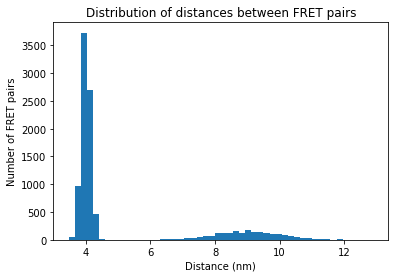

In [5]:
df = pd.read_table("/Users/cmdb/Documents/Classes/Biophysics/xid-79493606_2.txt", header=None, names=["rvals"])

# r values for each molecule
rvals = df["rvals"].tolist()

fig, ax = plt.subplots()
ax.hist(rvals, bins=50)
ax.set_title("Distribution of distances between FRET pairs")
ax.set_xlabel("Distance (nm)")
ax.set_ylabel("Number of FRET pairs")

## 2. Model the resulting distribution as a pair of Gaussian distributions.

### a.	What fraction of your molecules are in the folded state? 

In [7]:
from sklearn.mixture import GaussianMixture

rvals_array = np.asarray(rvals)
rvals_array = rvals_array.reshape(-1, 1)

# initialize Gaussian mixture model for a pair of Gaussian distributions
gmm = GaussianMixture(n_components=2,covariance_type="spherical")
# fit model to data
gmm_out = gmm.fit(rvals_array)

# weights_ gives you the % of molecules in either state
folded = gmm_out.weights_[0]
unfolded = gmm_out.weights_[1]

print("Fraction of molecules in folded state = " + str(folded))
print("Fraction of molecules in unfolded state = " + str(unfolded))

Fraction of molecules in folded state = 0.7927967664968633
Fraction of molecules in unfolded state = 0.20720323350313807


### b. How far apart are the donor and acceptor in the folded state and unfolded state?

In [8]:
# means_ gives you mean value (in this case distance) of each distribution
distance_folded = gmm_out.means_[0]
distance_unfolded = gmm_out.means_[1]

print("Distance between molecules in folded state = " + str(distance_folded) + "nm")
print("Distance between molecules in unfolded state = " + str(distance_unfolded) + "nm")

Distance between molecules in folded state = [3.99884392]nm
Distance between molecules in unfolded state = [9.00321577]nm


### c. What is the K of unfolding?

In [9]:
kval = unfolded/folded
print("k = " + str(kval))

k = 0.2613573140802636


### d. Assuming a temperature of 23 C, calculate ΔG_D.

In [48]:
R = 1.987 * 10**(-3)
temp = 296.15 #Kelvin, or 23C

delGd = (-1) * np.log(kval) * R * temp

print("deltaGd = " + str(delGd) + " kcal/mol")

deltaGd = 0.7896215787553167 kcal/mol
